# Proyek Analisis Data: Bike Sharing Dataset 🚲
- **Nama:** Ardian Bahri Putra
- **Email:** ardianbahri20@gmail.com
- **ID Dicoding:** ardianbahri40

## Menentukan Pertanyaan Bisnis

- Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?
- Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?
- Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?
- Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

#### Load Tabel Day

In [2]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Tabel Hour

In [3]:
hr_df = pd.read_csv("Data/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. **Pengaruh Hari Kerja dan Libur**  
   - Pengguna terdaftar (registered) lebih banyak di hari kerja dibanding pengguna kasual (casual).  
   - Hari libur cenderung memiliki lebih sedikit penyewaan dibandingkan hari kerja.  

2. **Tren Penggunaan Berdasarkan Jam**  
   - Jam sibuk terjadi pada pagi (07:00-09:00) dan sore (17:00-19:00).  
   - Malam hari dan dini hari memiliki jumlah penyewaan yang jauh lebih rendah.  

3. **Dampak Cuaca terhadap Penyewaan**  
   - Cuaca buruk (weathersit = 3 atau 4) menurunkan jumlah penyewaan sepeda.  
   - Kelembaban tinggi dan angin kencang juga berdampak negatif terhadap jumlah penyewa.  

4. **Pengaruh Musim terhadap Permintaan**  
   - Musim panas (season = 2) memiliki lebih banyak penyewa dibanding musim dingin (season = 4).  
   - Transisi musim seperti musim semi (season = 1) memiliki penyewaan yang bervariasi.  

5. **Perbedaan Perilaku Pengguna Terdaftar vs Kasual**  
   - Pengguna terdaftar (registered) lebih stabil dalam penggunaan dibanding kasual.  
   - Pengguna kasual lebih sering muncul di akhir pekan atau cuaca cerah.

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari data di atas, terdapat satu tipe data yang tidak sesuai berdasarkan kolomnya. Kolom yang perlu diperbaiki adalah **dteday** menjadi **datetime**.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Bisa disimpulkan bahwa tabel **day_df** tidak memiliki missing values, sehingga data dapat dianggap aman.

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [7]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan data di atas, terdapat satu kolom dengan tipe data yang tidak sesuai. Kolom yang perlu dikonversi adalah **dteday** menjadi **datetime**.

In [9]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


In [11]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada day.df dan hr.df terdapat kolom yang harus diubah yaitu dteday menjadi datetime.
- Tidak ada missing values dan keanehan pada nilai statistik kedua data tersebut.
- Tidak ada data yang terduplikasi.

### Cleaning Data

In [12]:
del hr_df

In [13]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [14]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  hum                731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  count              731 non-null    int64         
dtypes: categor

**Insight:**
- Menghapus tabel hr. Alasannya, tabel ini tidak relevan dengan pertanyaan bisnis yang telah ditetapkan, serta perbedaannya dengan tabel day hanya terletak pada kolom hr, sementara sisanya hampir sama.
- Menghapus kolom instant dan windspeed, karena tidak memberikan informasi yang relevan terhadap analisis jumlah penyewa sepeda.
- Mengubah beberapa detail kolom agar mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [18]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\2974312987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

In [19]:
day_df.groupby(by='weather_situation').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\3767222275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_situation').agg({


count                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [20]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\1497150874.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [21]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\2870456447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [22]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\3484920239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [23]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\3641718347.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [24]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

C:\Users\ardia\AppData\Local\Temp\ipykernel_13680\3725487608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

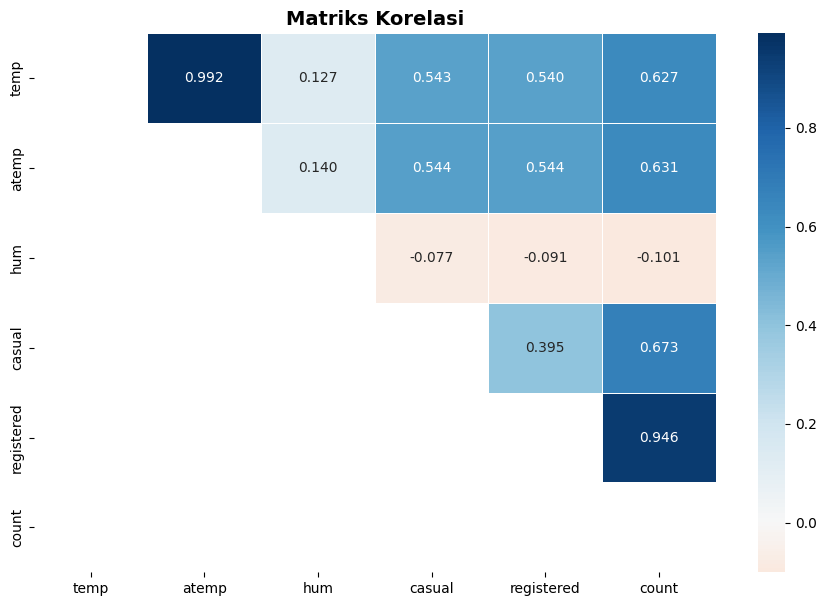

In [25]:
fig, ax = plt.subplots(figsize=(11, 7))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="RdBu",
    center=0,
    fmt=".3f",
    linewidths=0.5
)
plt.title("Matriks Korelasi", fontsize=14, fontweight="bold")
plt.show()

### Mengubah data clean ke csv

In [26]:
# data clean to csv
day_df.to_csv("Dashboard/day.csv", index=False)

**Insight:**
1. **Pengelompokan penyewa sepeda berdasarkan bulan**  
Dari hasil analisis, terlihat bahwa bulan dengan jumlah penyewa dan rata-rata tertinggi adalah Juni, sedangkan Januari memiliki jumlah dan rata-rata penyewa paling rendah.  

2. **Pengelompokan penyewa sepeda berdasarkan kondisi cuaca**  
Hasil analisis menunjukkan bahwa penyewa sepeda lebih sering menyewa ketika cuaca cerah atau mendung. Penyewaan sepeda sangat jarang terjadi saat turun salju dan tidak ada penyewaan saat cuaca sangat buruk.  

3. **Pengelompokan penyewa sepeda berdasarkan hari libur**  
Berdasarkan hasil yang diperoleh, penyewa lebih memilih menyewa sepeda pada hari biasa dibandingkan dengan hari libur.  

4. **Perbandingan jumlah penyewa sepeda pada hari kerja dan akhir pekan**  
Hasil analisis menunjukkan urutan jumlah rata-rata penyewa dari yang tertinggi hingga terendah adalah: Jumat, Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.  

5. **Pengelompokan penyewa sepeda berdasarkan hari kerja**  
Berdasarkan hasil yang diperoleh, jumlah penyewaan sepeda lebih banyak pada hari kerja dibandingkan hari non-kerja. Meskipun terdapat perbedaan, selisihnya tidak terlalu besar.  

6. **Pengelompokan penyewa sepeda berdasarkan musim**  
Dari hasil analisis, penyewaan sepeda tertinggi terjadi pada musim gugur, sebagaimana terlihat dari rata-rata yang lebih tinggi dibandingkan musim lainnya. Sementara itu, musim semi memiliki jumlah penyewa paling sedikit dengan rata-rata terendah.  

7. **Pengelompokan suhu, kelembaban, dan humidity berdasarkan musim**  
Berdasarkan hasil analisis, diperoleh beberapa kesimpulan berikut:  

   - Musim gugur memiliki rata-rata temperatur dan atemp tertinggi, diikuti oleh musim panas, musim dingin, dan musim semi.  
   - Kelembaban rata-rata tertinggi terjadi pada musim dingin, diikuti oleh musim gugur, musim panas, dan musim semi.  

8. **Hubungan antara penyewa casual, registered, dan total penyewa**  
Berdasarkan hasil analisis, ditemukan beberapa hubungan sebagai berikut:  

   - Terdapat korelasi sangat kuat antara atemp dan temp (0.99).  
   - Hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).  
   - Casual memiliki korelasi cukup dengan temp dan atemp (0.54) serta sedikit berkorelasi negatif dengan hum (-0.08).  
   - Registered memiliki pola serupa dengan casual dan memiliki korelasi moderat dengan casual (0.40).  
   - Total penyewa (count) memiliki korelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95) serta sedikit berkorelasi negatif dengan hum (-0.10).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?

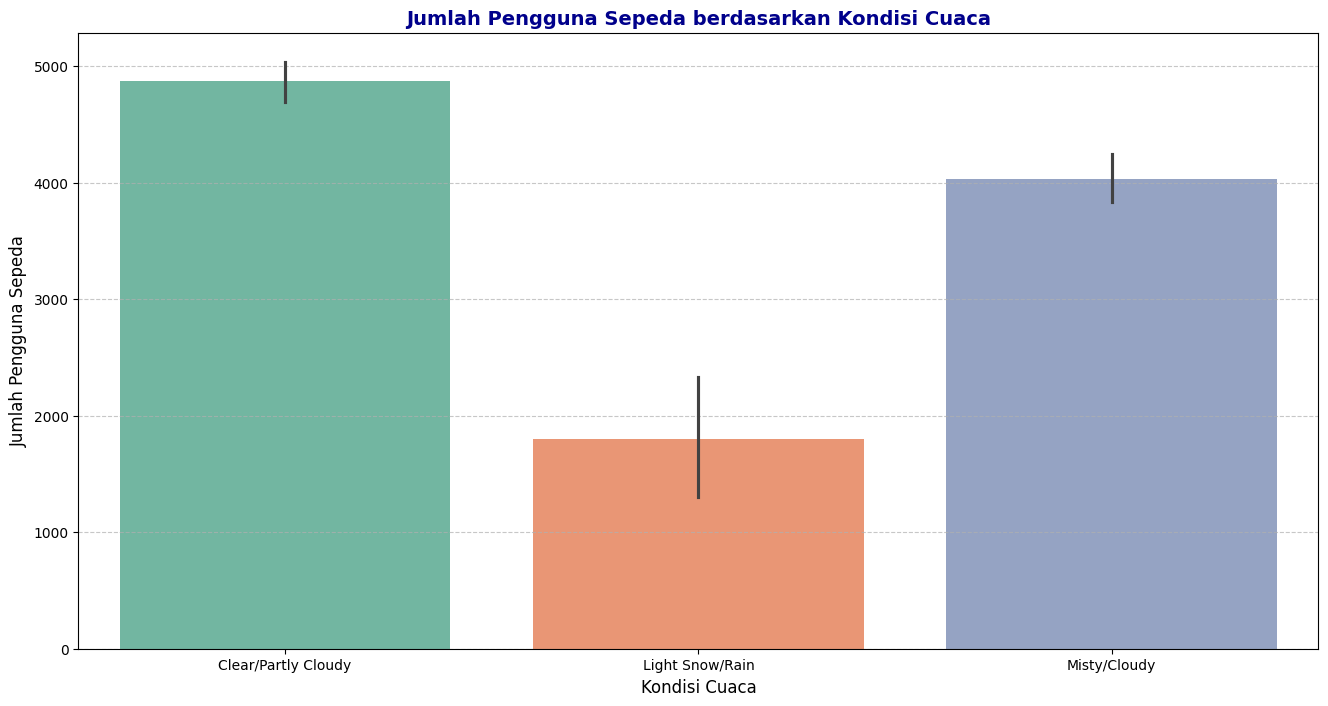

In [27]:
plt.figure(figsize=(16, 8))
sns.barplot(
    x='weather_situation',
    y='count',
    data=day_df,
    hue='weather_situation',
    palette="Set2",
    legend=False
)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca', fontsize=14, fontweight="bold", color='darkblue')
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Jumlah Pengguna Sepeda', fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

### Pertanyaan 2: Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?

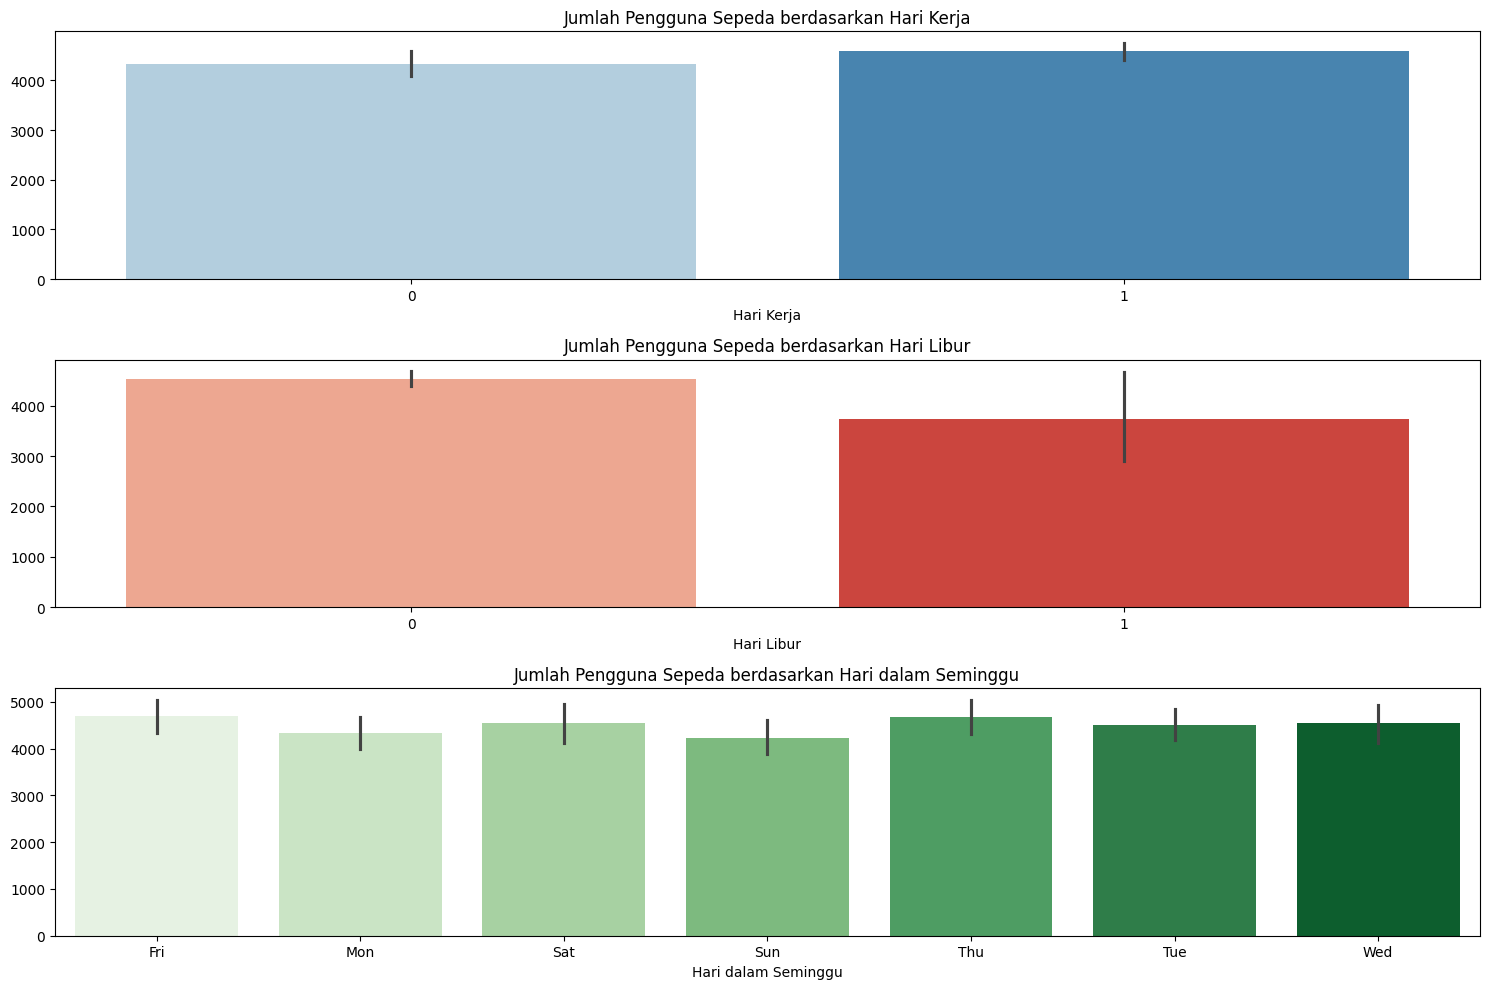

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0],
    hue='workingday',
    palette='Blues',
    legend=False)  
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel("")

# Berdasarkan holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    ax=axes[1],
    hue='holiday',
    palette='Reds',
    legend=False)  
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel("")

# Berdasarkan weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    ax=axes[2],
    hue='weekday',
    palette='Greens',
    legend=False)  
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?

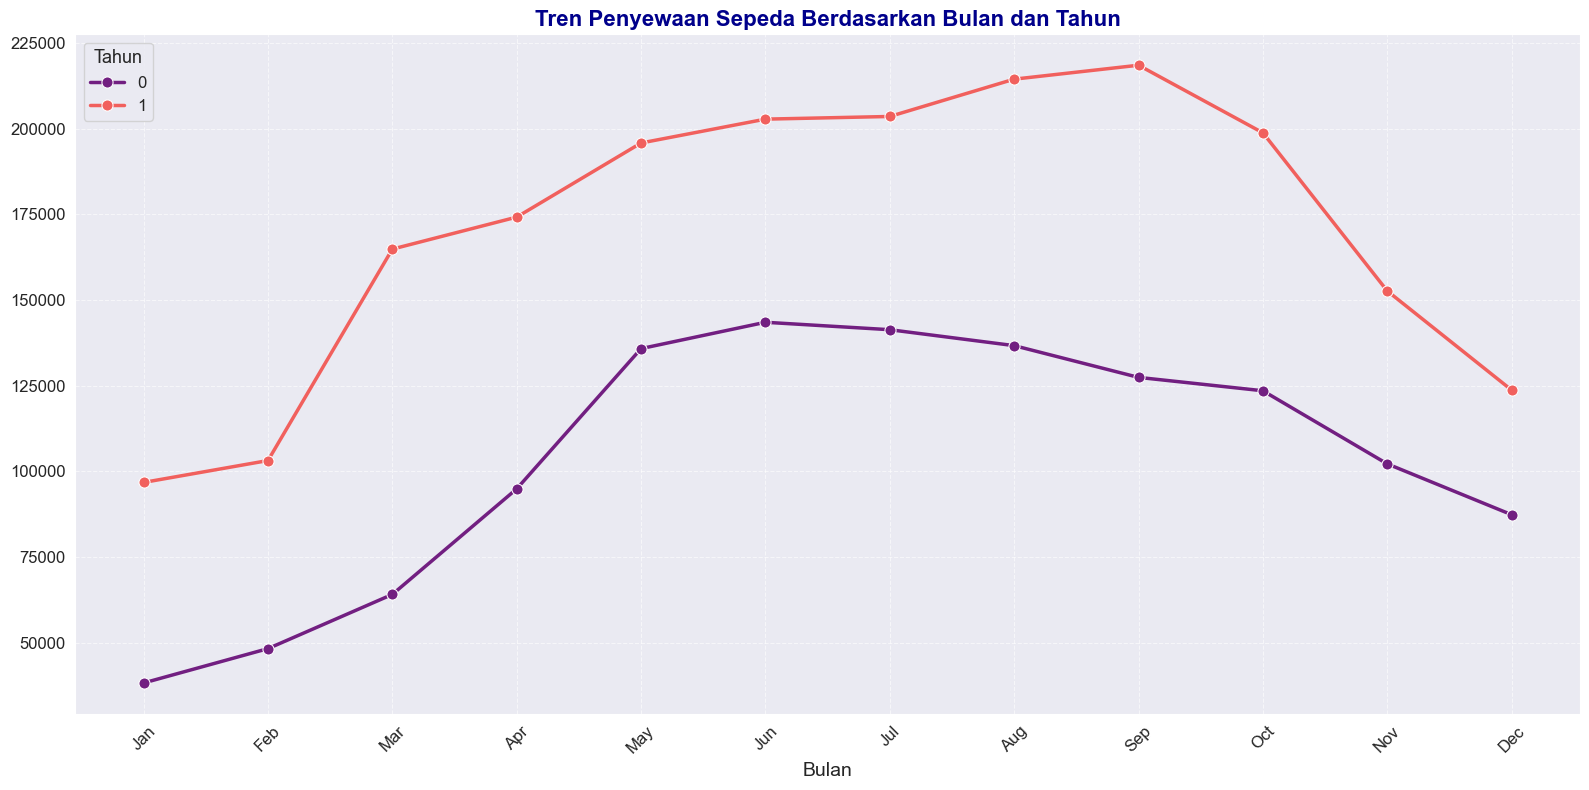

In [29]:
day_df['month'] = pd.Categorical(day_df['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], ordered=True)

monthly_counts = day_df.groupby(by=["month", "year"], observed=False).agg({
    "count": "sum"
}).reset_index()
sns.set_style("darkgrid")
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="magma",
    marker="o",
    linewidth=2.5,
    markersize=8
)
plt.title("Tren Penyewaan Sepeda Berdasarkan Bulan dan Tahun", fontsize=16, fontweight="bold", color='darkblue')
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Tahun", loc="upper left", fontsize=12, title_fontsize="13")

plt.tight_layout()
plt.show()

### Pertanyaan 4: Apakah ada pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan Casual dan Registered?

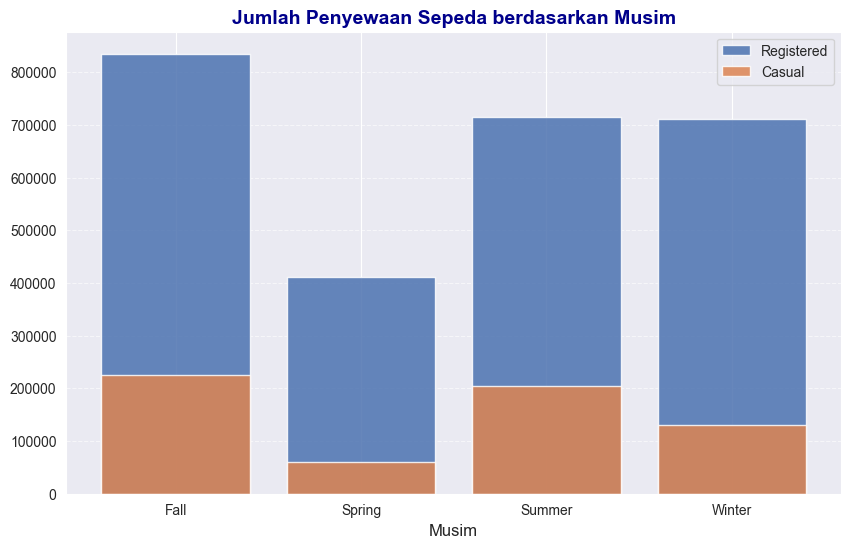

In [30]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah pengguna
seasonal_usage = day_df.groupby('season', observed=False)[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='#4C72B0',
    alpha=0.85
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='#DD8452',
    alpha=0.85
)

plt.xlabel('Musim', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim', fontsize=14, fontweight="bold", color='darkblue')
plt.legend(title="")
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

**Insight:**
1. **Cuaca Berpengaruh terhadap Penyewaan Sepeda**  
   Penyewa sepeda cenderung lebih banyak saat cuaca cerah atau setengah mendung dibandingkan saat cuaca berkabut/mendung atau hujan/salju. Hal ini menunjukkan bahwa faktor kenyamanan dan keamanan berkendara sangat memengaruhi keputusan penyewa dalam menggunakan sepeda.

2. **Hari Kerja Lebih Diminati Dibandingkan Akhir Pekan dan Hari Libur**  
   Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, dengan Jumat menjadi hari paling sibuk dan Minggu sebagai hari dengan penyewa paling sedikit. Selain itu, jumlah penyewa sepeda juga jauh lebih tinggi pada hari biasa dibandingkan hari libur nasional. Hal ini bisa disebabkan oleh penggunaan sepeda sebagai moda transportasi utama untuk bekerja atau beraktivitas rutin.

3. **Tren Peningkatan Penyewaan Sepeda pada Tahun 2012**  
   Tahun 2012 menunjukkan peningkatan jumlah penyewaan sepeda dibandingkan tahun sebelumnya. Puncak penyewaan terjadi pada bulan September, sedangkan Januari menjadi bulan dengan penyewaan terendah. Perbedaan pola ini menunjukkan bahwa tren penggunaan sepeda semakin meningkat, terutama pada bulan-bulan tertentu.

4. **Musim Gugur sebagai Musim Paling Favorit**  
   Penyewaan sepeda mencapai angka tertinggi pada musim gugur, diikuti oleh musim panas, musim dingin, dan musim semi. Hal ini bisa disebabkan oleh kondisi cuaca yang lebih nyaman pada musim gugur dibandingkan musim lainnya, sehingga lebih banyak orang tertarik untuk menggunakan sepeda.

## Conclusion

- Conclution pertanyaan 1: Terlihat adanya keterkaitan antara kondisi cuaca dan jumlah penyewa sepeda. Mayoritas pengguna lebih memilih bersepeda saat cuaca Cerah/Sedikit Mendung, dengan Q3 melebihi 6000, Q1 di bawah 4000, serta median mendekati 5000. Di posisi berikutnya, kondisi Berkabut/Mendung juga cukup diminati, dengan Q3 lebih dari 5000, Q1 di bawah 3000, dan median di atas 4000. Sebaliknya, kondisi Sedikit Bersalju/Hujan kurang diminati, dengan Q3 melampaui 2000, Q1 di bawah 1000, serta median sedikit di atas 1000. Sementara itu, tidak terdapat data untuk kondisi Badai Besar, kemungkinan karena kondisi tersebut tidak memungkinkan untuk aktivitas bersepeda.

- Conclution pertanyaan 2: Visualisasi ini menunjukkan tiga pola utama. Pertama, dalam hal jumlah pengguna sepeda berdasarkan workingday, hari kerja memiliki jumlah penyewa yang lebih tinggi dibandingkan hari non-kerja, meskipun selisihnya tidak terlalu besar. Keduanya tetap berada di atas 4000 pengguna. Kedua, jika dilihat dari faktor hari libur (holiday), jumlah penyewaan sepeda pada hari non-holiday jauh lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa pengguna cenderung lebih sering menyewa sepeda pada hari-hari biasa. Terakhir, berdasarkan weekday, hari dengan jumlah penyewaan tertinggi adalah Jumat (Fri) dengan rata-rata 4690.288462, sedangkan hari dengan jumlah penyewaan terendah adalah Minggu (Sun) dengan rata-rata 4228.828571.

- Conclution pertanyaan 3: Visualisasi ini memperlihatkan perbedaan pola puncak dan dasar jumlah penyewaan sepeda pada tahun 2011 dan 2012. Pada tahun 2011, jumlah tertinggi terjadi di bulan Juni, sedangkan jumlah terendah tercatat pada bulan Januari. Sementara itu, pada tahun 2012, puncak penyewaan terjadi di bulan September dengan dasar yang tetap berada di bulan Januari. Selain itu, dapat dilihat bahwa sepanjang tahun 2012, jumlah total sepeda yang disewakan secara konsisten lebih tinggi dibandingkan tahun 2011.

- Conclution pertanyaan 4: Pada visualisasi terakhir, hasil yang diperoleh cukup mengejutkan karena musim dingin (Winter) bukanlah yang memiliki jumlah penyewaan terendah. Justru, musim semi (Spring) menempati posisi terakhir dalam jumlah penyewaan sepeda. Faktor-faktor seperti kondisi cuaca, suhu udara, hari kerja, dan hari libur kemungkinan berperan dalam hasil ini. Sementara itu, musim gugur (Fall) berada di peringkat pertama dengan jumlah penyewaan sepeda yang melebihi 800.000.